In [ ]:
# Historgram Equalization
# Canny Edge Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


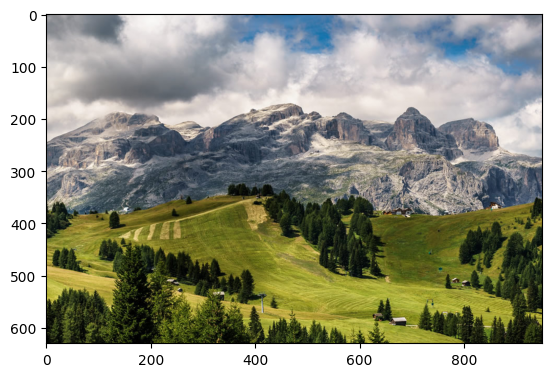

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('/content/drive/MyDrive/Machine-Vision/mountains.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


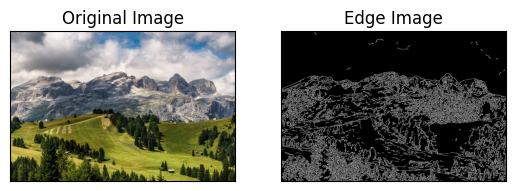

In [ ]:
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

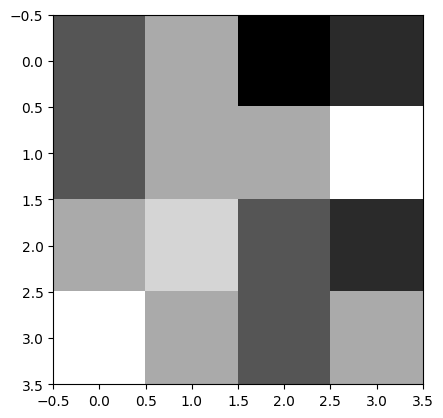

In [ ]:
image = np.array([[10, 12, 8, 9], [10, 12, 12, 14], [12, 13, 10, 9], [14, 12, 10, 12]])

plt.imshow(image, cmap='gray')

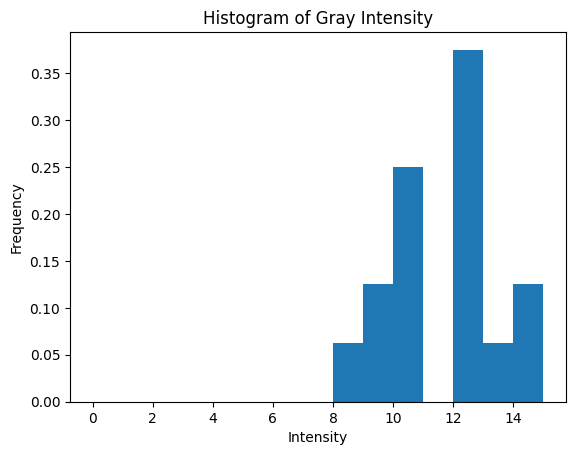

In [ ]:
hist, bin_edges = np.histogram(image, bins=range(16), density=True)


plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align='edge')

plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Gray Intensity')

plt.show()

In [ ]:
print({"hist" : hist, "edges" : bin_edges})

{'hist': array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0625, 0.125 , 0.25  , 0.    , 0.375 , 0.0625, 0.125 ]), 'edges': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])}


In [ ]:
cdf = hist.cumsum()

print(cdf)

[ 1  3  3  7  7  7 13 13 14 16]


In [ ]:
# cdf_normalized = (cdf * (cdf.max() - cdf.min()) + cdf.min())

print({"max" : cdf.max(), "min" : cdf.min()})

print(cdf_normalized)

{'max': 16, 'min': 1}
[ 16  46  46 106 106 106 196 196 211 241]


In [ ]:
# Perform histogram equalization
equalized_image = np.interp(image.flatten(), bin_edges[:-1], cdf_normalized)
equalized_image = equalized_image.reshape(image.shape)

In [ ]:
print(image)

print(equalized_image)

[[10 12  8  9]
 [10 12 12 14]
 [12 13 10  9]
 [14 12 10 12]]
[[106. 196.  16.  46.]
 [106. 196. 196. 241.]
 [196. 221. 106.  46.]
 [241. 196. 106. 196.]]


In [ ]:
histogram, bin_edges = np.histogram(image, bins=range(16))

cdf = histogram.cumsum()

cdf_normalized = ((cdf / 16) *  15).astype(np.uint8)

equalized_image = cdf_normalized[image]

print(equalized_image)

[[ 6 12  0  2]
 [ 6 12 12 15]
 [12 13  6  2]
 [15 12  6 12]]


In [ ]:
print(
    histogram,
    bin_edges,
    cdf,
    cdf_normalized,
    equalized_image, sep="\n\n")

[0 0 0 0 0 0 0 0 1 2 4 0 6 1 2]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

[ 0  0  0  0  0  0  0  0  1  3  7  7 13 14 16]

[ 0  0  0  0  0  0  0  0  0  2  6  6 12 13 15]

[[ 6 12  0  2]
 [ 6 12 12 15]
 [12 13  6  2]
 [15 12  6 12]]


<BarContainer object of 15 artists>

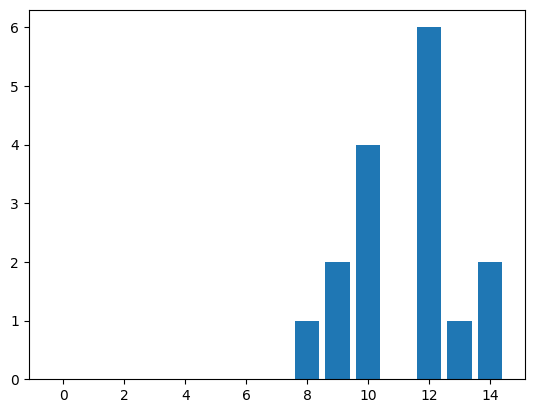

In [ ]:
plt.bar(bin_edges[:-1], histogram)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1 0 2 0 0 0 4 0 0 0 0 0 6 1 0 2]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


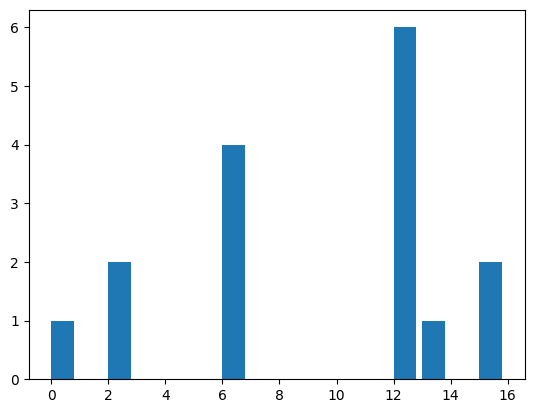

In [ ]:
histogram, bin_edges = np.histogram(equalized_image, bins=range(17))

print(type(histogram),
      type(bin_edges))



plt.bar(bin_edges[:-1], histogram,align='edge')

print(histogram, bin_edges, sep="\n\n")




### Canny Edge Detection

In [ ]:
originalImage = cv2.imread('/content/drive/MyDrive/Machine-Vision/bird.png')


originalImage  = np.array(cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY))

array([[87, 87, 88, ..., 27, 27, 27],
       [87, 87, 88, ..., 27, 27, 27],
       [88, 88, 88, ..., 27, 27, 29],
       ...,
       [58, 58, 58, ..., 12,  9,  8],
       [57, 57, 57, ..., 11,  9,  8],
       [57, 57, 57, ..., 11,  9,  8]], dtype=uint8)
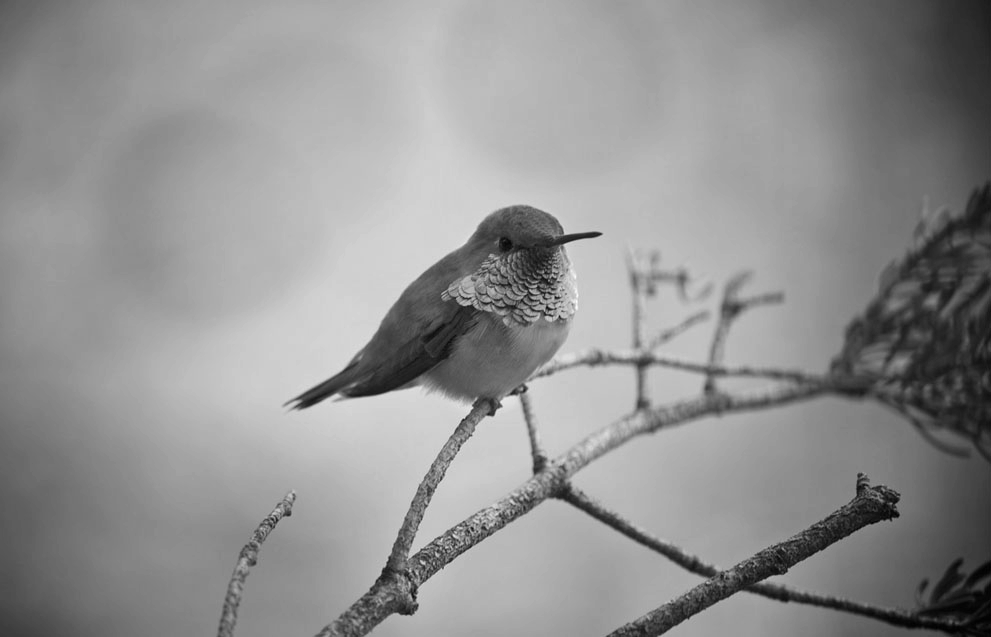

In [ ]:
originalImage

In [ ]:
gaussianKernel = [[1,4,7,4,1], [4,16,26,16,4], [7, 26, 41, 26, 7], [4, 16, 26, 16, 4], [1, 4, 7, 4, 1]]

In [ ]:
rows, columns = birdImage.shape

for i in range(2, rows - 2):
  for j in range(2,columns - 2):
      imgArray = np.array([[birdImage[i-2][j-2], birdImage[i-2][j-1], birdImage[i-2][j], birdImage[i-2][j+1], birdImage[i-2][j+2]],
                           [birdImage[i-1][j-2], birdImage[i-1][j-1], birdImage[i-1][j], birdImage[i-1][j+1], birdImage[i-1][j+2]],
                           [birdImage[i][j-2],   birdImage[i][j-1],   birdImage[i][j],   birdImage[i][j+1],   birdImage[i][j+2]],
                           [birdImage[i+1][j-2], birdImage[i+1][j-1], birdImage[i+1][j], birdImage[i+1][j+1], birdImage[i+1][j+2]],
                           [birdImage[i+2][j-2], birdImage[i+2][j-1], birdImage[i+2][j], birdImage[i+2][j+1], birdImage[i+2][j+2]]])

      intermediateArray = np.dot(gaussianKernel, imgArray)
      intermediateArray = intermediateArray.flatten()
      birdImage[i][j] = np.mean(intermediateArray).astype(np.uint8)


array([[ 87,  87,  88, ...,  27,  27,  27],
       [ 87,  87,  88, ...,  27,  27,  27],
       [ 88,  88, 207, ..., 192,  27,  29],
       ...,
       [ 58,  58,  22, ...,  80,   9,   8],
       [ 57,  57,  57, ...,  11,   9,   8],
       [ 57,  57,  57, ...,  11,   9,   8]], dtype=uint8)
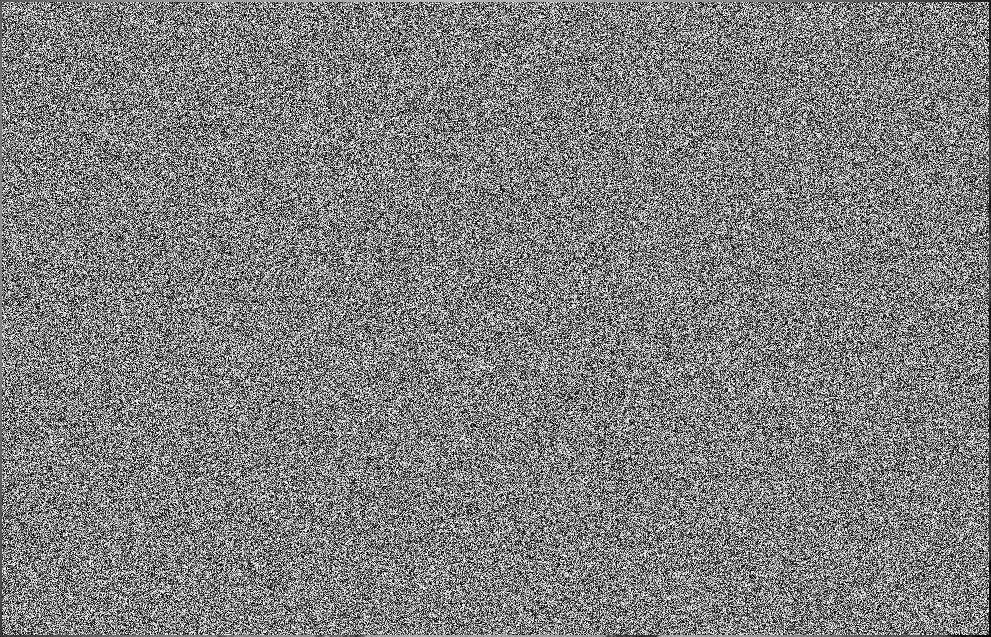

In [ ]:
birdImage